In [2]:
print(1)

1


In [3]:
import pandas as pd
from sklearn.datasets import fetch_openml

boston = fetch_openml(name='boston')
X = boston.data 
X.shape
Y=boston.target
Y.shape
print(f"{X},{Y}")

        CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\datasets\_openml.py:311: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python312\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
import pandas as pd
df=pd.DataFrame(X)
print(boston.feature_names)
df.columns = boston.feature_names
df.describe()

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000


In [5]:
boston.DESCR

"**Author**:   \n**Source**: Unknown - Date unknown  \n**Please cite**:   \n\nThe Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic\nprices and the demand for clean air', J. Environ. Economics & Management,\nvol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics\n...', Wiley, 1980.   N.B. Various transformations are used in the table on\npages 244-261 of the latter.\nVariables in order:\nCRIM     per capita crime rate by town\nZN       proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS    proportion of non-retail business acres per town\nCHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\nNOX      nitric oxides concentration (parts per 10 million)\nRM       average number of rooms per dwelling\nAGE      proportion of owner-occupied units built prior to 1940\nDIS      weighted distances to five Boston employment centres\nRAD      index of accessibility to radial highways\nTAX      full-value prope

In [6]:
from sklearn import model_selection
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.2, random_state=42)
print(X_test.shape)
print(Y_test.shape)
print(X_train.shape)
print(Y_train.shape)

(102, 13)
(102,)
(404, 13)
(404,)


In [13]:
from sklearn.linear_model import LinearRegression
alg1=LinearRegression()
alg1.fit(X_train,Y_train)
print(type(X_test))
print(X_test.shape)
print(X_test.isnull().sum())  # Check for missing values
print("Number of features in X_test:", X_test.shape[1])
print(X_test.dtypes)

<class 'pandas.core.frame.DataFrame'>
(102, 13)
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64
Number of features in X_test: 13
CRIM       int32
ZN         int32
INDUS      int32
CHAS       int32
NOX        int32
RM         int32
AGE        int32
DIS        int32
RAD        int32
TAX        int32
PTRATIO    int32
B          int32
LSTAT      int32
dtype: object


In [14]:
X_test = X_test.astype(int)  # to convert float data into int
Y_pred = alg1.predict(X_test)

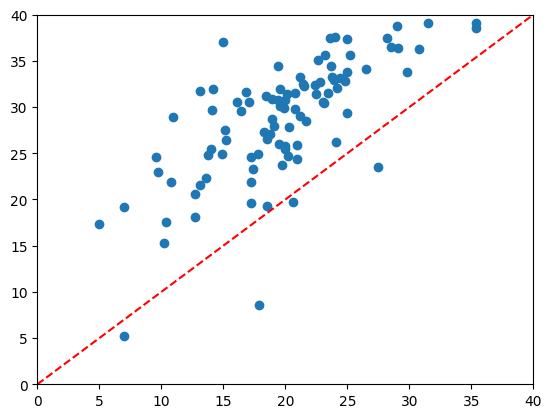

In [11]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,Y_pred)
plt.plot([0, 40], [0, 40], color='red', linestyle='--')  # Plotting y=x line
plt.axis([0,40,0,40])
plt.show()